In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
zip_path = "/content/archive (2).zip"
extract_path = "/content/nslkdd"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted:", os.listdir(extract_path))


Files extracted: ['KDDTest+.arff', 'KDDTrain+.txt', 'KDDTest+.txt', 'KDDTrain1.jpg', 'KDDTrain+_20Percent.arff', 'KDDTrain+.arff', 'KDDTest-21.txt', 'KDDTrain+_20Percent.txt', 'KDDTest1.jpg', 'nsl-kdd', 'KDDTest-21.arff', 'index.html']


In [ ]:
train_file = os.path.join(extract_path, "KDDTrain+.txt")
test_file  = os.path.join(extract_path, "KDDTest+.txt")


In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)


/tmp/ipython-input-3043694565.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding = HuggingFaceEmbeddings(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from langchain_community.vectorstores import Chroma

vector_db = Chroma.from_texts(
    attack_knowledge,
    embedding,
    persist_directory="./chroma_db"
)


In [ ]:
!pip install llama-cpp-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.16-cp312-cp312-linux_x86_64.whl size=4422318 sha256=3e3346d9482e6a311158811ef02d9f6628af48e7c3ef73c2028401b6f77bd33a
  Stored in directory: /root/.cache/pip/wheels/90/82/ab/8784ee3fb99ddb07fd36a679ddbe63122cc07718f6c1eb3be8
Successfully built llama-cpp-python


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

print("✅ Environment setup successful!")


✅ Environment setup successful!


In [ ]:
!unzip "/content/archive (2).zip" -d /content/nslkdd


Archive:  /content/archive (2).zip
  inflating: /content/nslkdd/KDDTest+.arff  
  inflating: /content/nslkdd/KDDTest+.txt  
  inflating: /content/nslkdd/KDDTest-21.arff  
  inflating: /content/nslkdd/KDDTest-21.txt  
  inflating: /content/nslkdd/KDDTest1.jpg  
  inflating: /content/nslkdd/KDDTrain+.arff  
  inflating: /content/nslkdd/KDDTrain+.txt  
  inflating: /content/nslkdd/KDDTrain+_20Percent.arff  
  inflating: /content/nslkdd/KDDTrain+_20Percent.txt  
  inflating: /content/nslkdd/KDDTrain1.jpg  
  inflating: /content/nslkdd/index.html  
  inflating: /content/nslkdd/nsl-kdd/KDDTest+.arff  
  inflating: /content/nslkdd/nsl-kdd/KDDTest+.txt  
  inflating: /content/nslkdd/nsl-kdd/KDDTest-21.arff  
  inflating: /content/nslkdd/nsl-kdd/KDDTest-21.txt  
  inflating: /content/nslkdd/nsl-kdd/KDDTest1.jpg  
  inflating: /content/nslkdd/nsl-kdd/KDDTrain+.arff  
  inflating: /content/nslkdd/nsl-kdd/KDDTrain+.txt  
  inflating: /content/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: 

✅ Train shape: (125973, 43)
✅ Test shape: (22544, 43)


In [ ]:
attack_map = {
    'normal': 'Normal',

    'neptune':'DoS','smurf':'DoS','back':'DoS','teardrop':'DoS',
    'land':'DoS','pod':'DoS',

    'satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe',

    'guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L',
    'phf':'R2L','multihop':'R2L','warezmaster':'R2L','warezclient':'R2L',

    'buffer_overflow':'U2R','loadmodule':'U2R',
    'perl':'U2R','rootkit':'U2R'
}

train['label'] = train['attack_type'].map(attack_map)
test['label']  = test['attack_type'].map(attack_map)

print(train['label'].value_counts())


label
Normal    67343
DoS       45927
Probe     11656
R2L         993
U2R          52
Name: count, dtype: int64


In [ ]:
# Remove rows with missing labels
train = train.dropna(subset=['label'])
test  = test.dropna(subset=['label'])

print("After cleaning:")
print("Train size:", train.shape)
print("Test size:", test.shape)


After cleaning:
Train size: (125971, 44)
Test size: (18794, 44)


In [ ]:
print("Missing labels in train:", train['label'].isna().sum())
print("Missing labels in test:", test['label'].isna().sum())


Missing labels in train: 0
Missing labels in test: 0


In [ ]:
X_train = train.drop(['attack_type', 'difficulty', 'label'], axis=1)
y_train = train['label']

X_test = test.drop(['attack_type', 'difficulty', 'label'], axis=1)
y_test = test['label']


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['protocol_type', 'service', 'flag']

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())


Before SMOTE:
label
Normal    67343
DoS       45927
Probe     11656
R2L         993
U2R          52
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(
    X_train_scaled, y_train
)


In [ ]:
print("After SMOTE:")
print(y_train_bal.value_counts())


After SMOTE:
label
Normal    67343
DoS       67343
R2L       67343
Probe     67343
U2R       67343
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=30,
    random_state=42
)
mlp.fit(X_train_bal, y_train_bal)

print("✅ All models trained successfully!")


✅ All models trained successfully!


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test_scaled)

print("📌 Random Forest – Per Class Metrics")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest – Per Class Metrics
              precision    recall  f1-score   support

         DoS       0.99      0.98      0.98      5741
      Normal       0.81      0.97      0.88      9711
       Probe       0.78      1.00      0.88      1106
         R2L       0.95      0.02      0.03      2199
         U2R       0.33      0.05      0.09        37

    accuracy                           0.86     18794
   macro avg       0.77      0.60      0.57     18794
weighted avg       0.88      0.86      0.81     18794



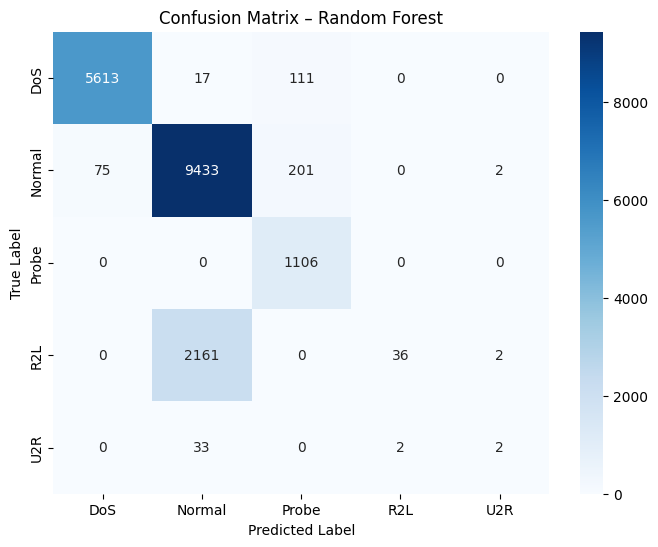

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=rf.classes_,
    yticklabels=rf.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "MLP": mlp
}

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.8614
Decision Tree Accuracy: 0.8135
MLP Accuracy: 0.8630


In [ ]:
import joblib

joblib.dump(rf, "rf_nids_model.pkl")
joblib.dump(dt, "dt_nids_model.pkl")
joblib.dump(mlp, "mlp_nids_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Models and scaler saved successfully!")


✅ Models and scaler saved successfully!


In [ ]:
rf_loaded = joblib.load("rf_nids_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler_loaded.transform(sample)

prediction = rf_loaded.predict(sample_scaled)
print("Predicted class:", prediction[0])


Predicted class: DoS


In [ ]:
  !pip install pyngrok


In [ ]:
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)

pred = rf.predict(sample_scaled)
print("Predicted class:", pred[0])


Predicted class: DoS


In [ ]:
%pip install chromadb sentence-transformers langchain langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.3 MB/s eta 0:

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings


In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

print("✅ Correct imports loaded successfully")


✅ Correct imports loaded successfully


In [ ]:
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

documents = [
    "DoS attacks overwhelm network resources to deny services.",
    "Probe attacks scan networks to identify vulnerabilities.",
    "R2L attacks gain unauthorized access from remote systems.",
    "U2R attacks escalate privileges to root level.",
    "Intrusion Detection Systems monitor traffic for malicious behavior."
]

vectordb = Chroma.from_texts(
    documents,
    embedding=embeddings,
    persist_directory="./chroma_nids"
)

vectordb.persist()
print("✅ ChromaDB vector store created successfully")


/tmp/ipython-input-3917338831.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ ChromaDB vector store created successfully


/tmp/ipython-input-3917338831.py:19: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()


In [ ]:
results = vectordb.similarity_search("Explain DoS attack", k=2)
for r in results:
    print("🔹", r.page_content)


🔹 DoS attacks overwhelm network resources to deny services.
🔹 R2L attacks gain unauthorized access from remote systems.


In [ ]:
from transformers import pipeline
from langchain_community.llms import HuggingFacePipeline

hf_pipeline = pipeline(
    "text2text-generation",
    model="google/flan-t5-base",
    max_length=256
)

llm = HuggingFacePipeline(pipeline=hf_pipeline)

print("✅ HuggingFace LLM loaded successfully")


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ HuggingFace LLM loaded successfully


/tmp/ipython-input-4057300862.py:10: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=hf_pipeline)


In [ ]:
from langchain_classic.chains import RetrievalQA


In [ ]:
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True
)

print("✅ RAG chain initialized successfully")


✅ RAG chain initialized successfully


In [ ]:
query = "Explain the DoS attack detected in the network traffic"
response = rag_chain(query)

print("🧠 RAG Answer:\n", response["result"])

print("\n📚 Retrieved Context:")
for doc in response["source_documents"]:
    print("-", doc.page_content)


/tmp/ipython-input-3962587890.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  response = rag_chain(query)


🧠 RAG Answer:
 Intrusion Detection Systems monitor traffic for malicious behavior

📚 Retrieved Context:
- DoS attacks overwhelm network resources to deny services.
- Intrusion Detection Systems monitor traffic for malicious behavior.


In [ ]:
attack_profile = {
    "DoS": {
        "severity": "High",
        "impact": "Service unavailability, network congestion",
        "mitigation": [
            "Enable rate limiting on network devices",
            "Deploy DDoS protection services",
            "Monitor traffic spikes and block malicious IPs",
            "Use intrusion prevention systems (IPS)"
        ]
    },
    "Probe": {
        "severity": "Medium",
        "impact": "Information leakage through scanning",
        "mitigation": [
            "Disable unused ports",
            "Use firewall rules",
            "Enable network scanning alerts"
        ]
    },
    "R2L": {
        "severity": "High",
        "impact": "Unauthorized access to system resources",
        "mitigation": [
            "Enforce strong authentication",
            "Monitor login attempts",
            "Apply access control policies"
        ]
    },
    "U2R": {
        "severity": "Critical",
        "impact": "Root-level system compromise",
        "mitigation": [
            "Patch system vulnerabilities",
            "Apply least privilege principle",
            "Monitor privilege escalation logs"
        ]
    },
    "Normal": {
        "severity": "Low",
        "impact": "No threat detected",
        "mitigation": [
            "Continue monitoring network traffic"
        ]
    }
}


In [ ]:
def security_ai_agent(predicted_class, rag_chain):
    # Step 1: Get RAG explanation
    query = f"Explain the {predicted_class} attack detected in the network traffic"
    rag_response = rag_chain.invoke(query)
    explanation = rag_response["result"]

    # Step 2: Get rule-based analysis
    profile = attack_profile[predicted_class]

    # Step 3: Build final AI response
    agent_response = {
        "Attack Type": predicted_class,
        "Severity": profile["severity"],
        "Impact": profile["impact"],
        "AI Explanation": explanation,
        "Recommended Mitigation": profile["mitigation"]
    }

    return agent_response


In [ ]:
predicted_attack = "DoS"   # from your ML model

agent_output = security_ai_agent(predicted_attack, rag_chain)

for key, value in agent_output.items():
    print(f"\n🔹 {key}:")
    if isinstance(value, list):
        for v in value:
            print("-", v)
    else:
        print(value)



🔹 Attack Type:
DoS

🔹 Severity:
High

🔹 Impact:
Service unavailability, network congestion

🔹 AI Explanation:
Intrusion Detection Systems monitor traffic for malicious behavior

🔹 Recommended Mitigation:
- Enable rate limiting on network devices
- Deploy DDoS protection services
- Monitor traffic spikes and block malicious IPs
- Use intrusion prevention systems (IPS)


In [ ]:
def nids_chatbot(user_question, predicted_attack, rag_chain):
    # Combine ML + Agent + RAG
    context = security_ai_agent(predicted_attack, rag_chain)

    prompt = f"""
    You are a cybersecurity assistant.

    Attack Type: {context['Attack Type']}
    Severity: {context['Severity']}
    Impact: {context['Impact']}
    Explanation: {context['AI Explanation']}
    Mitigation: {', '.join(context['Recommended Mitigation'])}

    User Question: {user_question}
    """

    answer = llm(prompt)
    return answer


In [ ]:
def nids_chatbot(user_question, predicted_attack, rag_chain):
    # Get AI agent context
    context = security_ai_agent(predicted_attack, rag_chain)

    prompt = f"""
    You are a cybersecurity assistant.

    Attack Type: {context['Attack Type']}
    Severity: {context['Severity']}
    Impact: {context['Impact']}
    Explanation: {context['AI Explanation']}
    Mitigation: {', '.join(context['Recommended Mitigation'])}

    User Question: {user_question}
    """

    answer = llm.invoke(prompt)
    return answer


In [ ]:
user_question = "How dangerous is this attack and how can I stop it?"

chat_response = nids_chatbot(
    user_question=user_question,
    predicted_attack="DoS",
    rag_chain=rag_chain
)

print("🤖 Chatbot Response:\n", chat_response)


🤖 Chatbot Response:
 High Impact: Service unavailability, network congestion
